# Chapter 7: Object Oriented Programming
by [Arief Rahman Hakim](https://github.com/ahman24)


## 1. Introduction to OOP
Procedural-oriented Programming (POP) is good for simple and small programs, while the OOP is better suited for large programs.

The object-oriented programming breaks the programming task into objects, which combine data (known as attributes) and behaviors/functions (known as methods). Therefore, there are two main components of the OOP,
* class,
* object.

The `class` is a **blueprint** to define a *logical grouping of data and functions*. It provides a way to create data structures that model real-world entities. For example, we can create **a people class** that contains the data such as *name, age, and some behavior functions* to print out ages and genders of a group of people. 

The `object` is an **instance of the class with actual values**. For example, a person named ‘Iron man’ with age 35. Put it another way, a **class is like a template** to define the needed information, and an **object is one specific copy that filled in the template**. 

In [1]:
class People():
    def __init__(self, name, age):
        self.name = name
        self.age = age
        
    def greet(self):
        print("Greetings, " + self.name)

In [2]:
person1 = People(name = 'Iron Man', age = 35)
person1.greet()
print(person1.name)
print(person1.age)

Greetings, Iron Man
Iron Man
35


In [3]:
person2 = People(name = 'Batman', age = 33)
person2.greet()
print(person2.name)
print(person2.age)

Greetings, Batman
Batman
33


Also, objects instantiated from the same class are independent from each other. For example, the object `person1` is not dependent to `person2`.

The concept of OOP is to create **reusable code**. There are three key principles of using OOP:
* Abstraction - a way to hide internal implementation details and should only reveal high-level mechanism for using it.
* Inheritance - a way of creating new classes from existing class without modifying it.
* Encapsulation - a way of hiding some of the private details of a class from other objects.
* Polymorphism - a way of using common operation in different ways for different data input.

## 2. CLASS AND OBJECT
### 2.A Class

The definition of a class is very similar to a function. It needs to be instantiated first before you can use it. For the class name, it is standard convention to use “CapWords.” The superclass is used when you want create a new class to inherit the attributes and methods from another already defined class. We will talk more about inheritance in the next section. 

The __init__ is one of the special methods in Python classes that is **run as soon as an object of a class is instantiated (created)**. It assigns initial values to the object before it is ready to be used. Note the two underscores at the beginning and end of the init, indicating this is a special method reserved for special use in the language. In this init method, you can assign attributes directly when you create the object. The other_methods functions are used to define the instance methods that will be applied on the attributes, just like functions we discussed before.

In [5]:
class Student():
    
    def __init__(self, sid, name, gender):
        self.sid = sid
        self.name = name
        self.gender = gender
        self.type = 'learning'
        
    def say_name(self):
        print("My name is " + self.name)
        
    def report(self, score):
        self.say_name()
        print("My id is: " + self.sid)
        print("My score is: " + str(score))

From the above example, the __init__ method will initialize the **attributes when we create an object**. We need to pass in the initial value for `sid`, `name`, and `gender`, while the attribute `type` is a fixed value as **learning**.

### 2.B Object

An **object is an instance** of the defined class **with actual values**. See the following example:

In [6]:
student1 = Student("001", "Susan", "F")
student2 = Student("002", "Mike", "M")

student1.say_name()
student2.say_name()
print(student1.type)
print(student1.gender)

My name is Susan
My name is Mike
learning
F


### 2.C Class vs instance attributes
The **attributes** we presented above are actually called **instance attributes** which belong to a specific instance. There are another type of attributes called class attributes, which will be shared with all the instances created from this class. Let us see an example how to define and use a class attribute.

EXAMPLE: Modify the `Student class` to add a class attribute `n` which will record `how many object` we are creating. Also, add a method `num_instances` to print out the number.

In [7]:
class Student():
    
    n_instances = 0
    
    def __init__(self, sid, name, gender):
        self.sid = sid
        self.name = name
        self.gender = gender
        self.type = 'learning'
        Student.n_instances += 1
        
    def say_name(self):
        print("My name is " + self.name)
        
    def report(self, score):
        self.say_name()
        print("My id is: " + self.sid)
        print("My score is: " + str(score))
        
    def num_instances(self):
        print(f'We have {Student.n_instances}-instance in total')

In [9]:
student1 = Student("001", "Susan", "F")
student2 = Student("002", "Mike", "M")
student1.num_instances()
student2.num_instances()

We have 4-instance in total
We have 4-instance in total


## 3. INHERITANCE
### 3.A Inheritance

Let's pick a code snippet from the book,

In [1]:
class Sensor():
    def __init__(self, name, location, record_date):
        self.name = name
        self.location = location
        self.record_date = record_date
        self.data = {}
        
    def add_data(self, t, data):
        self.data['time'] = t
        self.data['data'] = data
        print(f'We have {len(data)} points saved')        
        
    def clear_data(self):
        self.data = {}
        print('Data cleared!')

and instantiate the object,

In [2]:
import numpy as np

sensor1 = Sensor('sensor1', 'Berkeley', '2019-01-01')
data = np.random.randint(-10, 10, 10)
sensor1.add_data(np.arange(10), data)
sensor1.data

We have 10 points saved


{'time': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'data': array([ 4,  6,  8,  2,  8,  5,  3,  8,  0, -7])}

### 3.B Inherit and extend new method
If we have different sensors which have different function (method) in the class, we could use the inheritance principle in OOP.
We could create a new class which will inherit the `class Sensor` methods and attributes.

The book uses the `class Accelerometer` to inherit the `class Sensor` as follows,

In [3]:
class Accelerometer(Sensor):
    
    def show_type(self):
        print('I am an accelerometer!')
        
acc = Accelerometer('acc1', 'Oakland', '2019-02-01')
acc.show_type()
data = np.random.randint(-10, 10, 10)
acc.add_data(np.arange(10), data)
acc.data

I am an accelerometer!
We have 10 points saved


{'time': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'data': array([  3, -10,  -1,   3,   6,   0,   8,  -6,   4,   4])}

From looking the definition above, OOP helps a lot. We do not need to re-define the whole class and method again. We could inherit it from the `superClass Sensor`.

### 3.C Inherit and method Overriding
We could also override the method on the `superClass Sensor` as follows,

In [8]:
class UCBAcc(Accelerometer):
    
    def show_type(self):
        print(f'I am {self.name}, created at UC Berkeley!')
        
acc_ucb = UCBAcc('UCBAcc', 'Berkeley', '2019-03-01')
acc_ucb.show_type()

I am UCBAcc, created at UC Berkeley!


From the `class UCBAcc` above, we have seen that it overrides the method of the `class Accelerometer` by printing another statement.

### 3.D Inherit and update attributes with super
We could also override the `__init__` method to add or remove certain attributes from the class. For instance,

In [13]:
class NewSensor(Sensor):
    def __init__(self, name, location, record_date):
        self.name = name
        self.location = location
        self.record_date = record_date
        self.data = {}
        
new_sensor = NewSensor('OK', 'SF', '2019-03-01')

From the `__init__` above, it requires `name, location, and record_date`.  
If we want to add the attribute `brand`, of course we could override the `__init__` method. However, there's another way of doing so by using the `super` method as follows,

In [11]:
class NewSensor(Sensor):
    def __init__(self, name, location, record_date, brand):
        super().__init__(name, location, record_date)
        self.brand = brand
        
new_sensor = NewSensor('OK', 'SF', '2019-03-01', 'XYZ')
new_sensor.brand

'XYZ'

## 4. Encapsulation
**Encapsulation** is one of the fundamental concepts in OOP. It describes the idea of **restricting access to methods and attributes** in a class. This will **hide the complex details from the users**, and prevent data being modified by accident. In Python, this is achieved by using private methods or attributes using underscore as prefix, i.e. 
* `single “_”` : Private attributes but still accessible, or
* `double “__”`: Private attributes and inaccessible

Let us see the following example.

In [17]:
class Sensor():
    def __init__(self, name, location):
        self.name = name
        self._location = location
        self.__version = '1.0'
    
    # a getter function
    def get_version(self):
        print(f'The sensor version is {self.__version}')
    
    # a setter function
    def set_version(self, version):
        self.__version = version

In [19]:
sensor1 = Sensor('Acc', 'Berkeley')
print(sensor1.name)
print(sensor1._location)
print(sensor1.__version)

Acc
Berkeley


AttributeError: 'Sensor' object has no attribute '__version'

From the error message above, we shall see that by using the `double "__"`, we make the `__version` becomes inacessible. It encapsulates fine details to the user.  
To get the version, we need to use the `get_version` method or the `set_version` to set the version of the object

In [20]:
sensor1.get_version()

The sensor version is 1.0


In [21]:
sensor1.set_version('2.0')
sensor1.get_version()

The sensor version is 2.0


## 5. Polymorphism
**Polymorphism** is another fundamental concept in OOP, which means multiple forms. Polymorphism allows us to use a single interface with different underlying forms such as data types or classes. For example, **we can have commonly named methods across classes or child classes**. We have already seen one example above, **when we override the method `show_type` in the `UCBAcc`**. For **parent `class Accelerometer`** and **child class `UCBAcc`**, they both have a method named `show_type`, but they have different implementation. This ability of using single name with many forms acting differently in different situations greatly reduces our complexities. We will not expand to discuss more of Polymorphism, if you are interested, check more online to get a deeper understanding.

## 6. Abstraction
**Abstraction** allows us to show only useful data by providing the most necessary details whereas **Encapsulation** wraps the code by hiding unnecessary details from the user. **Abstraction** enables the user to implement more complex logic on top of the provided abstraction without understanding or even thinking about all hidden complexity. We could think **Abstraction** as the extension of the **Encapsulation**

## 7. Problems
### Q1
Describe what are the differences of classes versus objects.

**Class** is a blueprint. We could define what should exist in the blueprint. For instance, **Class** is more like a car manufacturing factory. Once we built the factory, we need to provide the function (`method`) on the factory (`class`) on how to manufacture the car.

We could call **Objects** as the product of the blueprint (**Class**). Once a red BMW car is produced, we could call it as `red_BMW` **object** produced from the `car_factory` **class**.


### Q2
Describe why we use self as the first argument in the methods.

To refer to the class itself.

### Q5
The following is a definition of the `class Point` that takes in the coordinate `x, y`. Add a method `plot_point` that plot the position of point.

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt

class Point():
   def __init__(self, x, y):
       self.x = x
       self.y = y
   def plot_point(self):
       plt.plot(self.x, self.y)
       plt.show

Lets generate the random numbers for x and y, 

For x=[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.], 
and y=[71 74 31 13 59 44 46 23 55 56], 

here are the plots by using the plot_point method


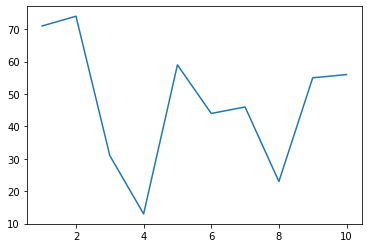

In [36]:
print('Lets generate the random numbers for x and y, \n')
x = np.linspace(1, 10, 10)
y = np.random.randint(0,100,10)

print(f'For x={x}, \nand y={y}, \n\nhere are the plots by using the plot_point method')
xy_array = Point(x,y)
xy_array.plot_point()

### Q6
Use the class from problem 5, add a method `calculate_dist` which takes in x and y from another point, and returns the distance calculated between the two points.

In [42]:
import math
class newPoint(Point):
    def calculate_distance(self, point1, point2):
        """
        Define which the points index from the arrays for the distance calculation
        """
        # adjusting for the python idx system
        point1 = point1-1
        point2 = point2-1

        x1 = self.x[point1]
        x2 = self.x[point2]
        y1 = self.y[point1]
        y2 = self.y[point2]
        d = math.sqrt(math.pow((x1 - x2), 2) + math.pow((y1 - y2), 2))
        return d

In [43]:
calc_dist = newPoint(x,y)
calc_dist.calculate_distance(1,2)

3.1622776601683795

### Q10
What’s the `super` method? Why do we need it?

The `super` method allows us to recall a specific method in the `superClass` from the `childClass`. Since it is easier to recall the method, it helps to extend the code later on when needed without referring to the `superClass` explicitly